<a href="https://colab.research.google.com/github/umarmahmoud/FinanceReportDashboard/blob/main/Hospital_patient_record_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the data in "/content/_full.xlsx" to determine admission rates by ethnicity and gender, count admitted patients by birth and death dates, list encounter class and description counts, calculate total claims by payer, normalize total claims, and find the insurance cost. Provide visualizations for each analysis.

## Load the data

### Subtask:
Load the data from the provided Excel file into a pandas DataFrame.


**Reasoning**:
Import the pandas library and load the Excel file into a DataFrame, then display the head of the DataFrame to verify the loading.



In [ ]:
import pandas as pd

df = pd.read_excel('/content/_full.xlsx')
display(df.head())

,START,STOP,ORGANIZATION,ENCOUNTERCLASS,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONDESCRIPTION,BIRTHDATE,...,COUNTY,PAYER,PAYER_ADDRESS,PAYER_CITY,STATE_HEADQUARTERED,ZIP,PHONE,PROCEDURE_DESCRIPTION,BASE_COST,REASON_DESCRIPTION_FOR_PROCEDURE
0,2011-01-02 10:26:36,2011-01-02 13:58:36,MASSACHUSETTS GENERAL HOSPITAL,ambulatory,Encounter for problem (procedure),85.55,1018.02,0.00,NaN,1928-08-25,...,Suffolk County,NO_INSURANCE,NaN,NaN,NaN,NaN,NaN,Renal dialysis (procedure),903.0,NaN
1,2011-01-05 13:58:36,2011-01-05 17:42:36,MASSACHUSETTS GENERAL HOSPITAL,ambulatory,Encounter for problem (procedure),85.55,1370.79,0.00,NaN,1928-08-25,...,Suffolk County,NO_INSURANCE,NaN,NaN,NaN,NaN,NaN,Renal dialysis (procedure),1255.0,NaN
2,2011-01-03 06:44:39,2011-01-03 07:01:42,MASSACHUSETTS GENERAL HOSPITAL,outpatient,Patient encounter procedure,142.58,2619.36,0.00,NaN,1964-01-05,...,Suffolk County,NO_INSURANCE,NaN,NaN,NaN,NaN,NaN,Intramuscular injection,2477.0,NaN
3,2011-01-08 17:42:36,2011-01-08 21:15:36,MASSACHUSETTS GENERAL HOSPITAL,ambulatory,Encounter for problem (procedure),85.55,1671.32,0.00,NaN,1928-08-25,...,Suffolk County,NO_INSURANCE,NaN,NaN,NaN,NaN,NaN,Renal dialysis (procedure),1556.0,NaN
4,2011-01-04 15:49:55,2011-01-04 16:04:55,MASSACHUSETTS GENERAL HOSPITAL,ambulatory,Encounter for problem,85.55,11855.19,11205.43,Malignant tumor of colon,1954-08-26,...,Suffolk County,Medicaid,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323,Combined chemotherapy and radiation therapy (p...,11620.0,Malignant tumor of colon


## Analyze admissions by ethnicity and gender

### Subtask:
Determine the count of admitted patients by ethnicity and gender and calculate which group was admitted more.


**Reasoning**:
Group the data by ethnicity and gender and count the occurrences to determine admission rates.



In [ ]:
admitted_counts = df.groupby(['ETHNICITY', 'GENDER']).size().reset_index(name='count')
display(admitted_counts)
most_admitted_group = admitted_counts.loc[admitted_counts['count'].idxmax()]
display("Group with the highest admission count:")
display(most_admitted_group)

,ETHNICITY,GENDER,count
0,hispanic,F,4661
1,hispanic,M,6156
2,nonhispanic,F,27529
3,nonhispanic,M,22576


'Group with the highest admission count:'

,2
ETHNICITY,nonhispanic
GENDER,F
count,27529


## Analyze admissions by birth date and death date

### Subtask:
Calculate the count of admitted patients based on their birth and death dates.


**Reasoning**:
Convert 'BIRTHDATE' and 'DEATHDATE' columns to datetime objects and then count non-null values in these columns.



In [ ]:
df['BIRTHDATE'] = pd.to_datetime(df['BIRTHDATE'])
df['DEATHDATE'] = pd.to_datetime(df['DEATHDATE'])

birthdate_count = df['BIRTHDATE'].notnull().sum()
deathdate_count = df['DEATHDATE'].notnull().sum()

print(f"Count of patients with recorded birth dates: {birthdate_count}")
print(f"Count of patients with recorded death dates: {deathdate_count}")

Count of patients with recorded birth dates: 60922
Count of patients with recorded death dates: 11722


## Analyze encounter class and description

### Subtask:
Get the counts of each encounter class and description.


**Reasoning**:
Calculate and display the value counts for the 'ENCOUNTERCLASS' and 'DESCRIPTION' columns.



In [ ]:
encounter_class_counts = df['ENCOUNTERCLASS'].value_counts()
description_counts = df['DESCRIPTION'].value_counts()
display("Value counts for ENCOUNTERCLASS:")
display(encounter_class_counts)
display("Value counts for DESCRIPTION:")
display(description_counts)

'Value counts for ENCOUNTERCLASS:'

,count
ENCOUNTERCLASS,
ambulatory,23508
outpatient,17941
wellness,9533
urgentcare,3674
inpatient,3227
emergency,3039


'Value counts for DESCRIPTION:'

,count
DESCRIPTION,
Encounter for check up (procedure),14010
General examination of patient (procedure),9482
Encounter for problem (procedure),5831
Urgent care clinic (procedure),3636
Encounter for symptom,3431
Follow-up encounter,3360
Prenatal visit,2982
Encounter for problem,2751
Prenatal initial visit,2509


## Analyze total claim by payer

### Subtask:
Calculate the total claim amount for each payer.


**Reasoning**:
Group the DataFrame by 'PAYER' and calculate the sum of 'TOTAL_CLAIM_COST' for each group, then display the result.



In [ ]:
total_claim_by_payer = df.groupby('PAYER')['TOTAL_CLAIM_COST'].sum()
display(total_claim_by_payer)

,TOTAL_CLAIM_COST
PAYER,
Aetna,1.428996e+07
Anthem,2.289787e+07
Blue Cross Blue Shield,1.660025e+07
Cigna Health,1.547713e+07
Dual Eligible,7.903969e+06
Humana,1.865669e+07
Medicaid,5.962049e+07
Medicare,9.137077e+07
NO_INSURANCE,1.400480e+08


## Normalize the total claim

### Subtask:
Normalize the total claim amounts to facilitate comparison across different payers.


**Reasoning**:
Normalize the total claim amounts using MinMaxScaler.



In [ ]:
from sklearn.preprocessing import MinMaxScaler

reshaped_total_claim = total_claim_by_payer.values.reshape(-1, 1)
scaler = MinMaxScaler()
normalized_total_claim = scaler.fit_transform(reshaped_total_claim)
display("Normalized Total Claim Amounts:")
display(normalized_total_claim)

'Normalized Total Claim Amounts:'

array([[0.04832594],
       [0.11346631],
       [0.06580908],
       [0.05730987],
       [0.        ],
       [0.08137122],
       [0.39136468],
       [0.63163487],
       [1.        ],
       [0.04113797]])

## Analyze insurance cost

### Subtask:
Determine the cost of insurance from the data.


**Reasoning**:
Calculate the sum of the 'PAYER_COVERAGE' column to determine the total insurance cost.



In [ ]:
total_insurance_cost = df['PAYER_COVERAGE'].sum()
print(f"Total insurance cost: {total_insurance_cost}")

Total insurance cost: 147373852.04


## Visualize the findings

### Subtask:
Create appropriate visualizations for each analysis step to illustrate the results clearly.


**Reasoning**:
Create visualizations for the analysis steps as requested. This includes bar charts for admission counts by ethnicity and gender, birth/death date counts, encounter class counts, top 10 description counts, total claim by payer, normalized total claim, and total insurance cost.



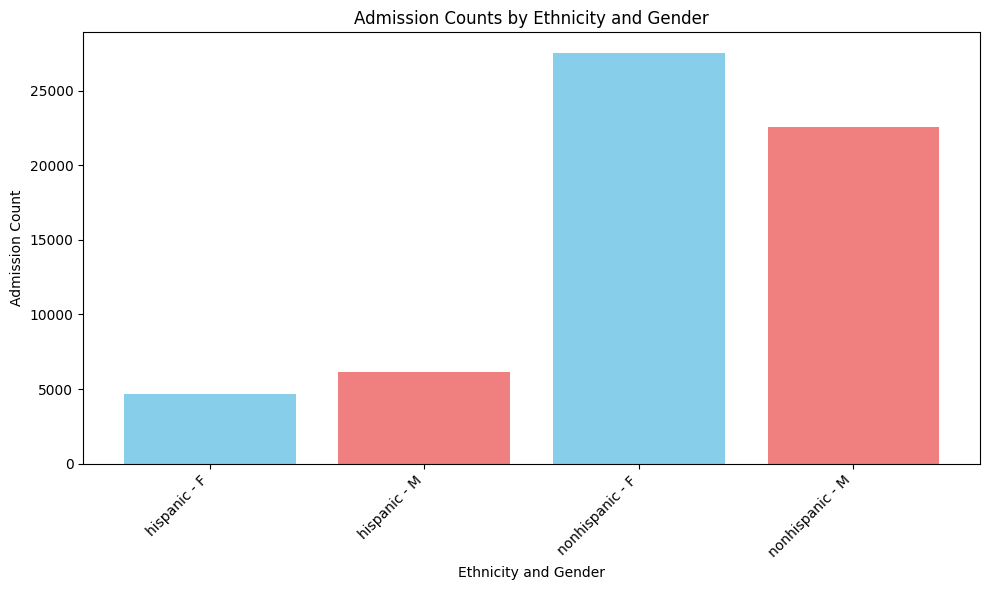

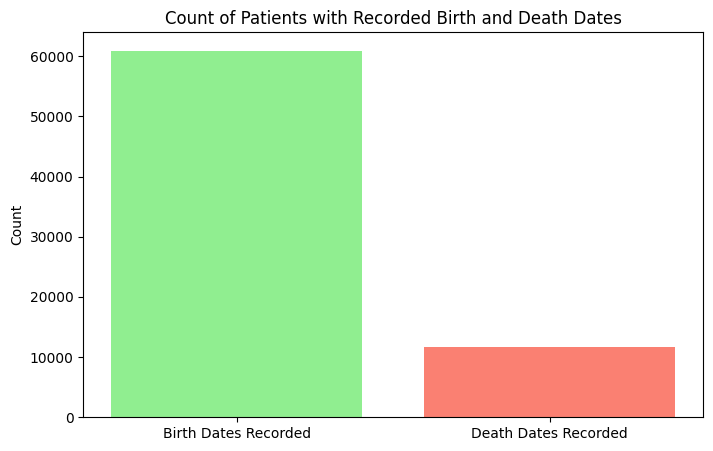

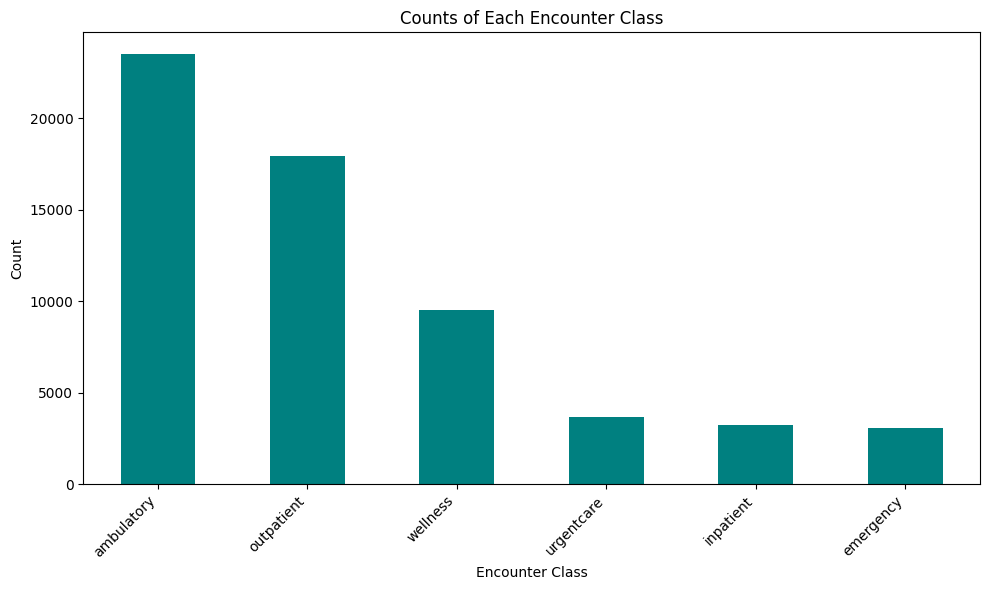

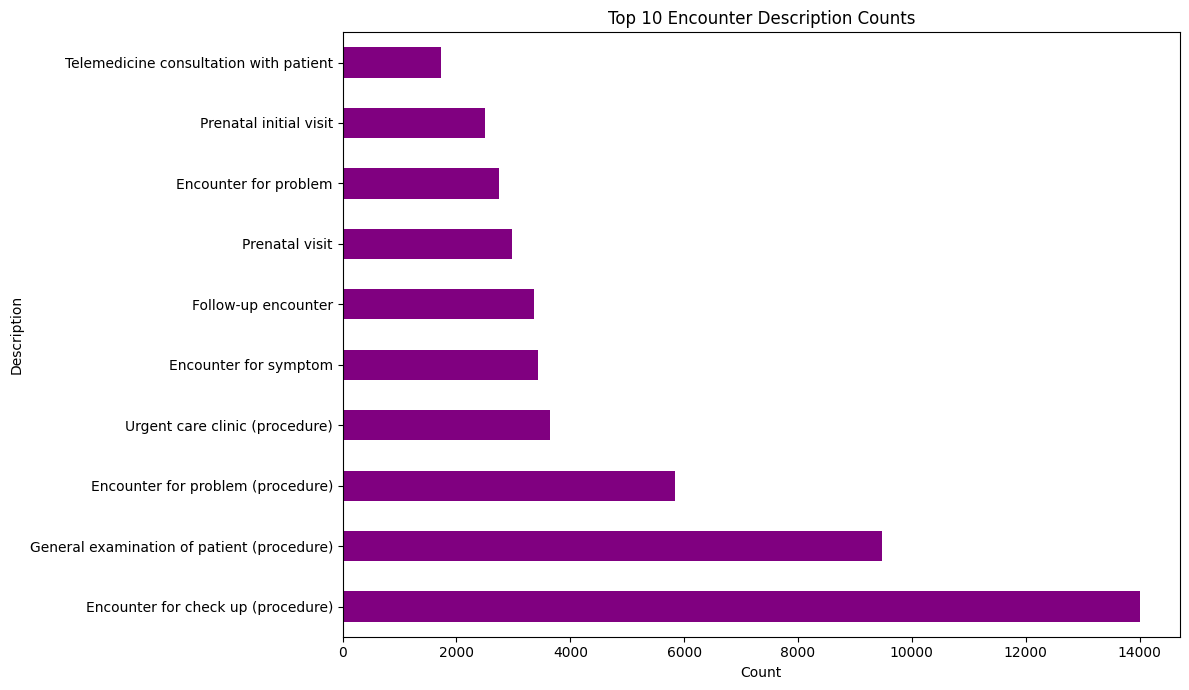

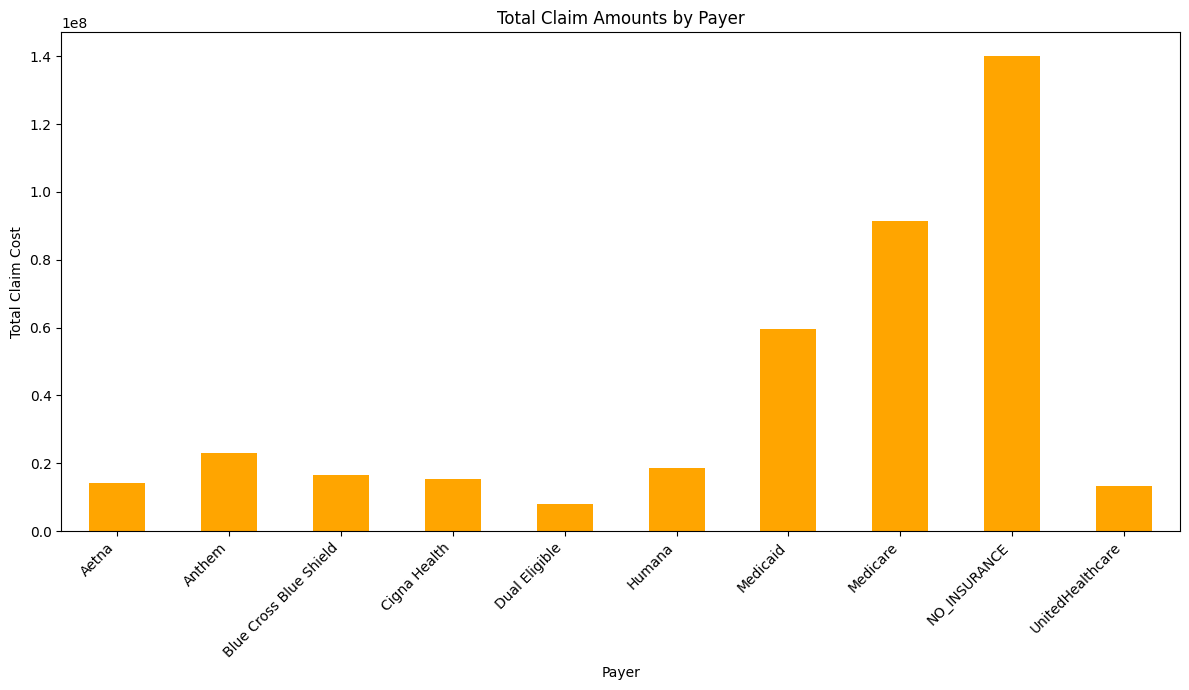

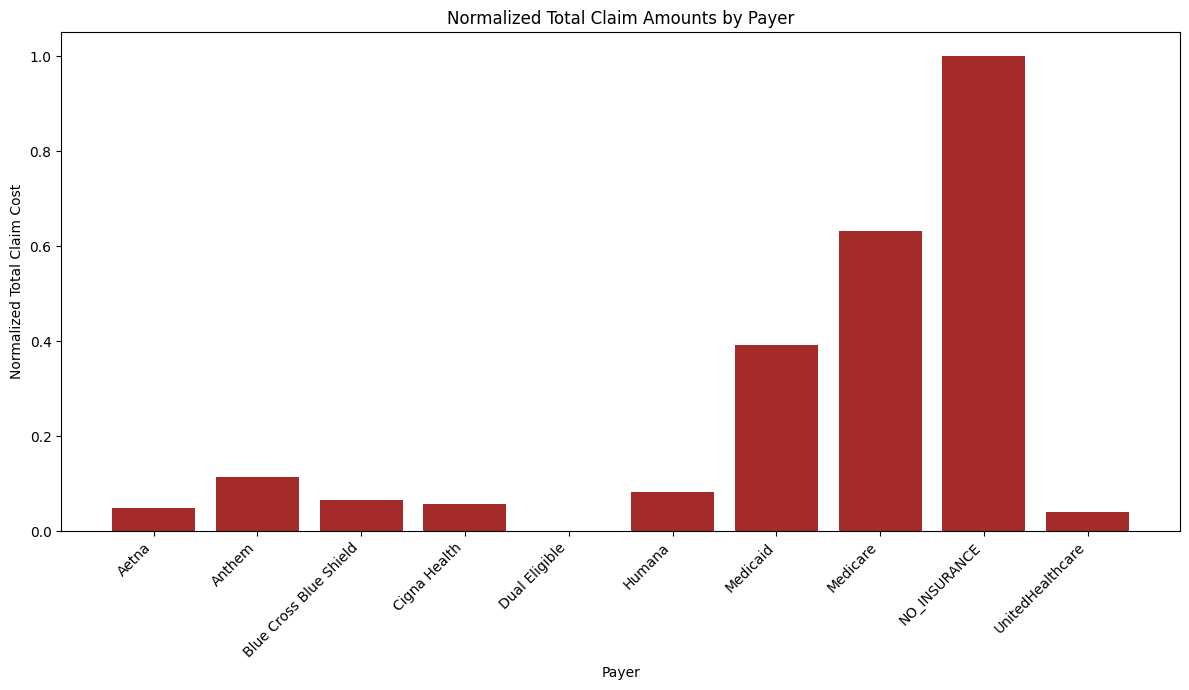

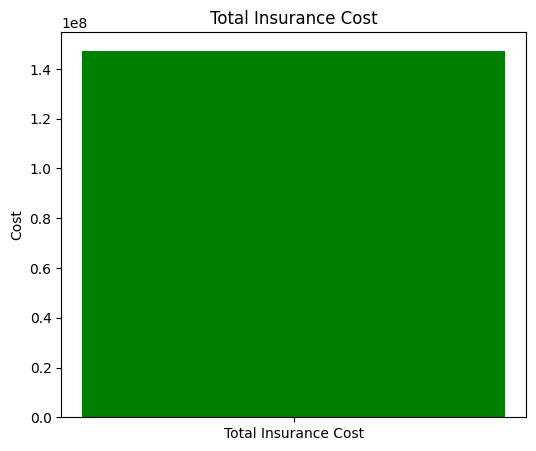

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Bar chart for admission counts by ethnicity and gender
admitted_counts['ethnicity_gender'] = admitted_counts['ETHNICITY'] + ' - ' + admitted_counts['GENDER']
plt.figure(figsize=(10, 6))
plt.bar(admitted_counts['ethnicity_gender'], admitted_counts['count'], color=['skyblue', 'lightcoral', 'skyblue', 'lightcoral'])
plt.xlabel('Ethnicity and Gender')
plt.ylabel('Admission Count')
plt.title('Admission Counts by Ethnicity and Gender')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Bar chart for birth date and death date counts
counts = pd.DataFrame({'Date Type': ['Birth Dates Recorded', 'Death Dates Recorded'], 'Count': [birthdate_count, deathdate_count]})
plt.figure(figsize=(8, 5))
plt.bar(counts['Date Type'], counts['Count'], color=['lightgreen', 'salmon'])
plt.ylabel('Count')
plt.title('Count of Patients with Recorded Birth and Death Dates')
plt.show()

# 3. Bar chart for encounter class counts
plt.figure(figsize=(10, 6))
encounter_class_counts.plot(kind='bar', color='teal')
plt.xlabel('Encounter Class')
plt.ylabel('Count')
plt.title('Counts of Each Encounter Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Bar chart for top 10 description counts
top_10_descriptions = description_counts.head(10)
plt.figure(figsize=(12, 7))
top_10_descriptions.plot(kind='barh', color='purple')
plt.xlabel('Count')
plt.ylabel('Description')
plt.title('Top 10 Encounter Description Counts')
plt.tight_layout()
plt.show()

# 5. Bar chart for total claim amounts by payer
plt.figure(figsize=(12, 7))
total_claim_by_payer.plot(kind='bar', color='orange')
plt.xlabel('Payer')
plt.ylabel('Total Claim Cost')
plt.title('Total Claim Amounts by Payer')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. Bar chart for normalized total claim amounts by payer
payers = total_claim_by_payer.index
plt.figure(figsize=(12, 7))
plt.bar(payers, normalized_total_claim.flatten(), color='brown')
plt.xlabel('Payer')
plt.ylabel('Normalized Total Claim Cost')
plt.title('Normalized Total Claim Amounts by Payer')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 7. Bar chart for total insurance cost
plt.figure(figsize=(6, 5))
plt.bar(['Total Insurance Cost'], [total_insurance_cost], color='green')
plt.ylabel('Cost')
plt.title('Total Insurance Cost')
plt.show()

## Summary:

### Data Analysis Key Findings

*   Nonhispanic females had the highest admission count (27,529) compared to other ethnicity and gender groups.
*   There were significantly more patients with recorded birth dates (60,922) than with recorded death dates (11,722).
*   The most frequent encounter classes were 'ambulatory', 'outpatient', and 'wellness'.
*   The most common encounter descriptions included "Encounter for check up (procedure)" and "General examination of patient (procedure)".
*   Payers like "NO\_INSURANCE" and "Medicare" had the highest total claim costs.
*   The total insurance cost calculated from the data was \$147,373,852.04.

### Insights or Next Steps

*   Further analysis could explore the reasons behind the higher admission rate for nonhispanic females and investigate if it correlates with specific health conditions or demographics within that group.
*   Investigating the distribution of encounter descriptions within the most frequent encounter classes could provide deeper insights into the common types of healthcare interactions.
